In [5]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import os
import random
from sys import platform as sys_pf
import matplotlib
if sys_pf == 'darwin':
    matplotlib.use("TkAgg")
from matplotlib import pyplot as plt

### Data

generating figure 1 of 5
generating figure 2 of 5
generating figure 3 of 5
generating figure 4 of 5
generating figure 5 of 5


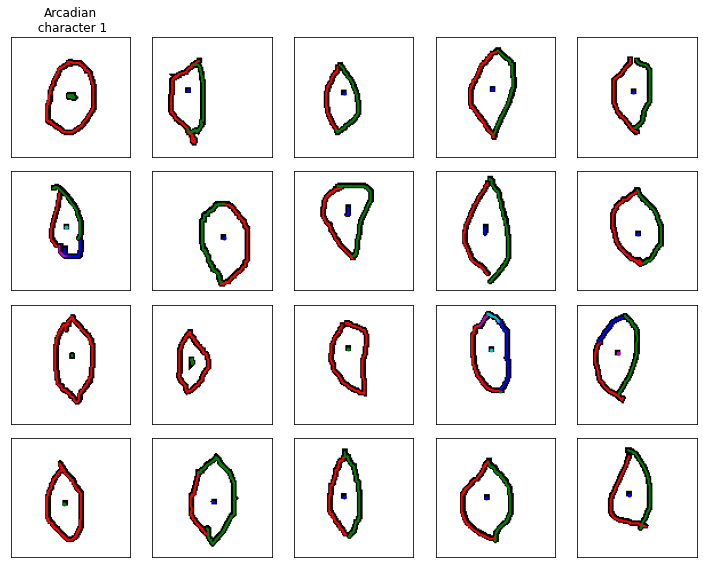

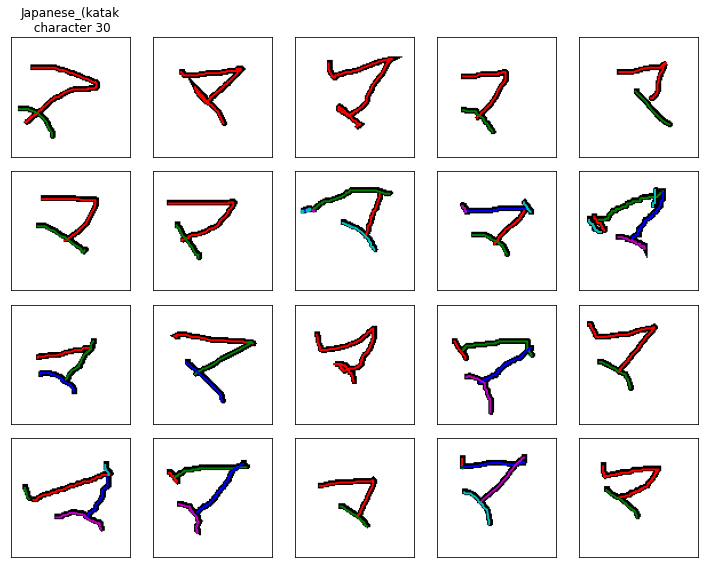

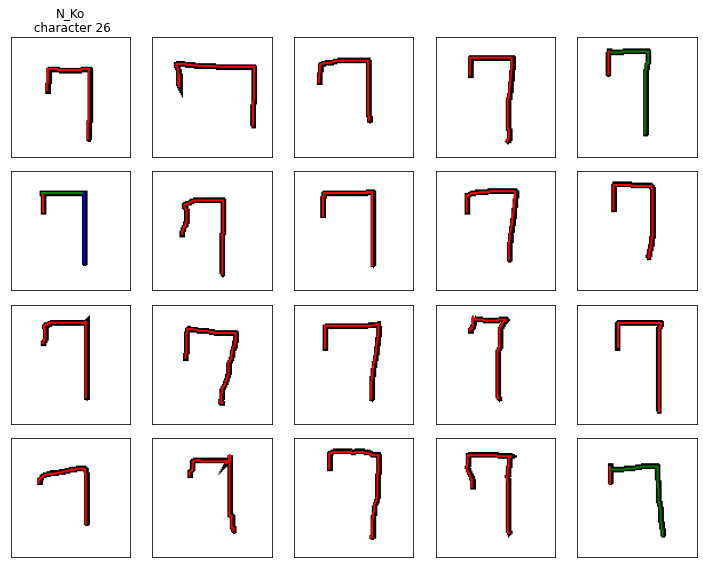

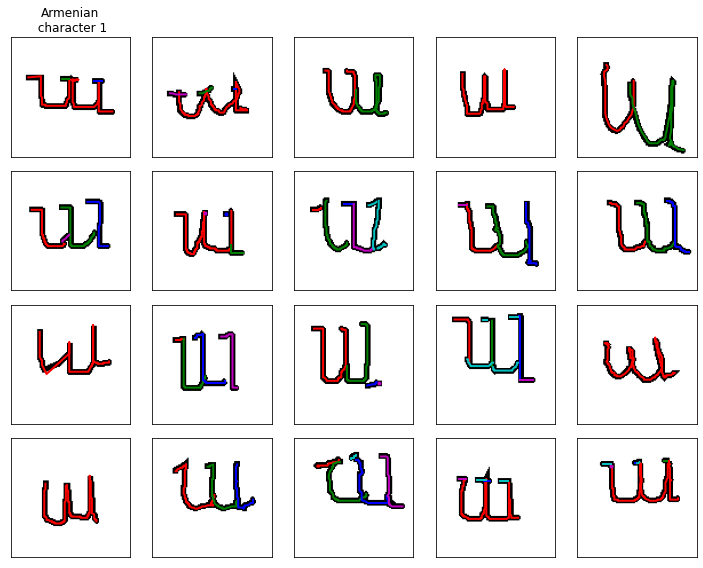

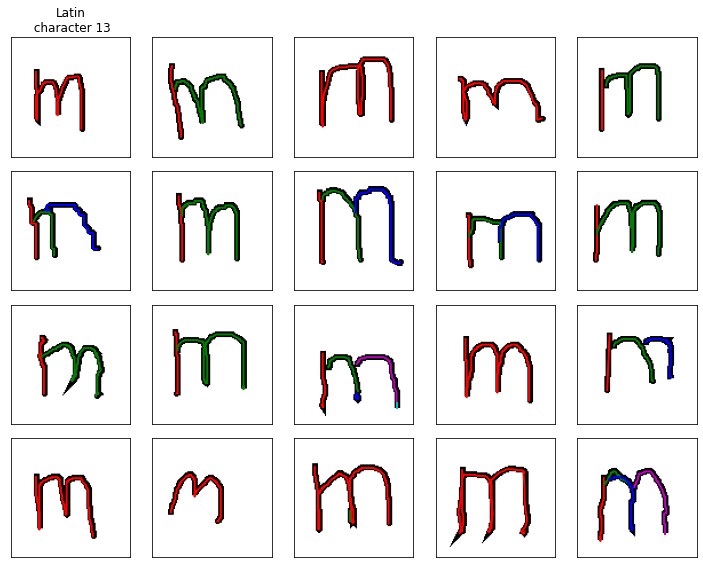

In [12]:
# load image and stroke data fro a character

# Plot the motor trajectory over an image
#
# Input
#  I: [105 x 105 nump] grayscale image
#  drawings: [ns list] of strokes (numpy arrays) in motor space
#  lw : line width

def plot_motor_to_image(I, drawing, lw=2):
    drawing = [d[:, 0:2] for d in drawing] # strip off the timing data (third column)
    drawing = [space_motor_to_img(d) for d in drawing] # convert to image space
    plt.imshow(I, cmap='gray')
    ns = len(drawing)
    for sid in range(ns):
        plot_traj(drawing[sid], get_color(sid), lw)
    plt.xticks([])
    plt.yticks([])
    
# Plot individual stroke
#
# Input
#  stk: [n x 2] individual stroke
#  color: stroke color
#  lw: line width
def plot_traj(stk,color,lw):
	n = stk.shape[0]
	if n > 1:
		plt.plot(stk[:,0],stk[:,1],color=color,linewidth=lw)
	else:
		plt.plot(stk[0,0],stk[0,1],color=color,linewidth=lw,marker='.')

# Color map for the stroke of index k
def get_color(k):	
    scol = ['r','g','b','m','c']
    ncol = len(scol)
    if k < ncol:
       out = scol[k]
    else:
       out = scol[-1]
    return out

# convert to str and add leading zero to single digit numbers
def num2str(idx):
	if idx < 10:
		return '0'+str(idx)
	return str(idx)

# Load binary image for a character
#
# fn : filename
def load_img(fn):
	I = plt.imread(fn)
	I = np.array(I,dtype=bool)
	return I

# Load stroke data for a character from text file
#
# Input
#   fn : filename
#
# Output
#   motor : list of strokes (each is a [n x 3] numpy array)
#      first two columns are coordinates
#	   the last column is the timing data (in milliseconds)
def load_motor(fn):
	motor = []
	with open(fn,'r') as fid:
		lines = fid.readlines()
	lines = [l.strip() for l in lines]
	for myline in lines:
		if myline =='START': # beginning of character
			stk = []
		elif myline =='BREAK': # break between strokes
			stk = np.array(stk)
			motor.append(stk) # add to list of strokes
			stk = [] 
		else:
			arr = np.fromstring(myline,dtype=float,sep=',')
			stk.append(arr)
	return motor

#
# Map from motor space to image space (or vice versa)
#
# Input
#   pt: [n x 2] points (rows) in motor coordinates
#
# Output
#  new_pt: [n x 2] points (rows) in image coordinates
def space_motor_to_img(pt):
	pt[:,1] = -pt[:,1]
	return pt
def space_img_to_motor(pt):
	pt[:,1] = -pt[:,1]
	return

if __name__ == "__main__":
	img_dir = 'data\\images_background'
	stroke_dir = 'data\\strokes_background'
	nreps = 20 # number of renditions for each character
	nalpha = 5 # number of alphabets to show

	alphabet_names = [a for a in os.listdir(img_dir) if a[0] != '.'] # get folder names
	alphabet_names = random.sample(alphabet_names,nalpha) # choose random alphabets

	for a in range(nalpha): # for each alphabet
		print('generating figure ' + str(a+1) + ' of ' + str(nalpha))
		alpha_name = alphabet_names[a]
		
		# choose a random character from the alphabet
		character_id = random.randint(1,len(os.listdir(os.path.join(img_dir,alpha_name))))

		# get image and stroke directories for this character
		img_char_dir = os.path.join(img_dir,alpha_name,'character'+num2str(character_id))
		stroke_char_dir = os.path.join(stroke_dir,alpha_name,'character'+num2str(character_id))

		# get base file name for this character
		fn_example = os.listdir(img_char_dir)[0]
		fn_base = fn_example[:fn_example.find('_')] 

		plt.figure(a,figsize=(10,8))
		plt.clf()
		for r in range(1,nreps+1): # for each rendition
			plt.subplot(4,5,r)
			fn_stk = stroke_char_dir + '/' + fn_base + '_' + num2str(r) + '.txt'
			fn_img = img_char_dir + '/' + fn_base + '_' + num2str(r) + '.png'			
			motor = load_motor(fn_stk)
			I = load_img(fn_img)
			plot_motor_to_image(I,motor)
			if r==1:
				plt.title(alpha_name[:15] + '\n character ' + str(character_id))
		plt.tight_layout()
	plt.show()

In [ ]:
#get all data in the directory
train_generator = ImageDataGenerator().

### Models

### Evaluation